In [1]:
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys
import numpy as np
sys.path.append(os.path.abspath("../src"))

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
from gan import GAN

In [4]:
noise_size = 64
model = GAN(noise_dim=noise_size,
            input_dim=(28, 28, 1),
            discriminator_units=(8, 8),
            generator_units=(7*7*3, 32, 16))

Tensor("reshape_1/Reshape:0", shape=(?, 7, 7, 3), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, ?, ?, 32), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 147)               9555      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 3)           0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 16)        4624      
_______________

In [5]:
data = mnist.load_data()
train, test = data
X, y = train
X = X[y==5]
X = X.astype(np.float32) / 128 - 1
X = np.expand_dims(X, 3)

In [ ]:
predictions = []
noise = np.random.normal(0, 1, (64, noise_size))


In [15]:
for i in range(1000):
    print(i)
    model.train(X, 1, 512)
    pred = model.generator.predict(noise)
    predictions.append(pred)

0
2.9513812 , 0.15143177, 0.02421875 , 0.9573242
1
2.9083455 , 0.14523947, 0.020898437 , 0.96181643
2
2.9521751 , 0.14523026, 0.02421875 , 0.9616211
3
2.9295495 , 0.1454848, 0.023242187 , 0.96171874
4
2.8800457 , 0.1469309, 0.0265625 , 0.96005857
5
2.930686 , 0.1455796, 0.02109375 , 0.9603516
6
2.8820024 , 0.14496598, 0.025585938 , 0.96240234
7
2.86145 , 0.1508261, 0.025 , 0.95947266
8
2.8329272 , 0.1532152, 0.026757812 , 0.9586914
9
2.8493257 , 0.1572923, 0.0296875 , 0.95517576
10
2.8775277 , 0.16221642, 0.029492188 , 0.9524414
11
2.8507667 , 0.15878333, 0.03378906 , 0.9567383
12
2.8285613 , 0.15468238, 0.029492188 , 0.9607422
13
2.9019608 , 0.15068667, 0.026171874 , 0.9591797
14
2.9010715 , 0.14653404, 0.0234375 , 0.9616211
15
2.8539424 , 0.14751694, 0.026757812 , 0.9623047
16
2.9072442 , 0.1462855, 0.021484375 , 0.9611328
17
2.8702762 , 0.14564657, 0.025 , 0.9607422
18
2.8856711 , 0.1484708, 0.019140625 , 0.96347654
19
2.8403082 , 0.14807709, 0.02421875 , 0.9611328
20
2.8071733 , 0.

1.8470173 , 0.37780043, 0.15664062 , 0.8354492
164
1.8306322 , 0.38783076, 0.16132812 , 0.82851565
165
1.7889401 , 0.38612577, 0.16191407 , 0.8276367
166
1.8057511 , 0.38853592, 0.16113281 , 0.8246094
167
1.8172309 , 0.38646245, 0.15546875 , 0.8294922
168
1.8135853 , 0.39739585, 0.153125 , 0.82177734
169
1.7651861 , 0.38879484, 0.16933593 , 0.8291992
170
1.787164 , 0.39557368, 0.15878907 , 0.8216797
171
1.7505016 , 0.3970282, 0.16367188 , 0.8214844
172
1.7915089 , 0.40679258, 0.16367188 , 0.81259763
173
1.7675049 , 0.4091177, 0.16367188 , 0.81396484
174
1.7708746 , 0.40762123, 0.16914062 , 0.81523436
175
1.7558138 , 0.4021867, 0.16933593 , 0.8185547
176
1.7746325 , 0.4127923, 0.17617187 , 0.8131836
177
1.7298231 , 0.41826373, 0.18242188 , 0.80810547
178
1.7425417 , 0.41064557, 0.17734376 , 0.8123047
179
1.774572 , 0.39982757, 0.1529297 , 0.81699216
180
1.7265053 , 0.39994898, 0.17226562 , 0.82041013
181
1.7402519 , 0.39826477, 0.1734375 , 0.81757814
182
1.7683117 , 0.40804926, 0.167968

KeyboardInterrupt: 

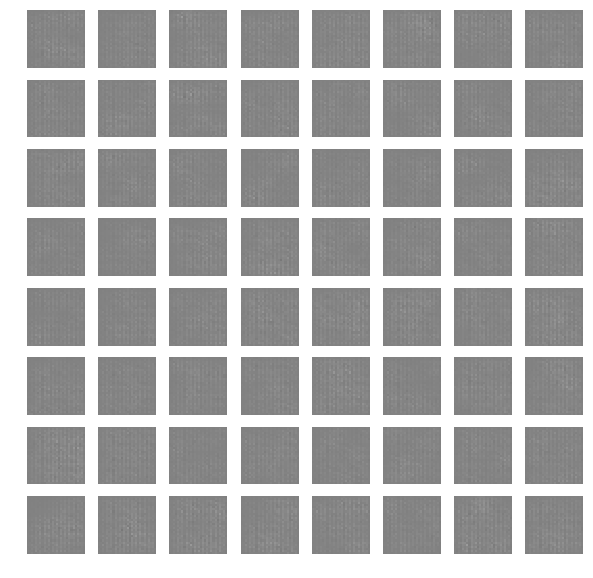

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig, axes = plt.subplots(8, 8)
fig.set_figheight(10)
fig.set_figwidth(10)
axes = axes.ravel()
ims =  [ ax.imshow(predictions[0][i,:,:,0], 
                   vmin=-1, vmax=1, cmap="gray_r",
                   animated=True)
         for i, ax in enumerate(axes)
       ]
for ax in axes:
    ax.axis("off")


def animate(i):
    for j, im in enumerate(ims):
        im.set_array(predictions[i][j,:,:,0])
    return ims


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(predictions), interval=100, blit=True)
plt.show()


In [17]:
HTML(anim.to_html5_video())

In [ ]:
anim.save("fives.mp4")